<a href="https://colab.research.google.com/github/anttiey/2022F-Ajou-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [ ]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 19)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 19)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Best parameter > Euclidean: 18
Test accuracy: 0.57000


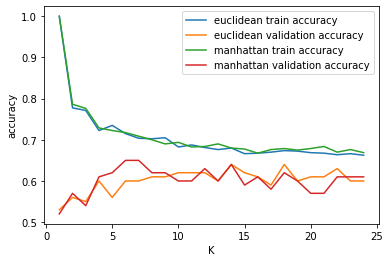

In [8]:
### 문제 1 ###
### 코드 작성 ###

K = range(1, 25)

euclidean_train_acc = []
euclidean_val_acc = []

manhattan_train_acc = []
manhattan_val_acc = []

euclidean_max = 0
manhattan_max = 0

for i in K:
  KNNclassifier_euclidean = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
  KNNclassifier_manhattan = KNeighborsClassifier(n_neighbors = i, metric = "manhattan")

  KNNclassifier_euclidean.fit(X_train, y_train)
  KNNclassifier_manhattan.fit(X_train, y_train)

  euclidean_train_acc.append(KNNclassifier_euclidean.score(X_train, y_train))
  manhattan_train_acc.append(KNNclassifier_manhattan.score(X_train, y_train))

  euclidean_score = KNNclassifier_euclidean.score(X_val, y_val)
  manhattan_score = KNNclassifier_manhattan.score(X_val, y_val)

  euclidean_val_acc.append(euclidean_score)
  manhattan_val_acc.append(manhattan_score)

  if euclidean_score >= max(euclidean_val_acc):
    euclidean_max = i
    
  if manhattan_score >= max(manhattan_val_acc):
    manhattan_max = i
  

plt.figure()
plt.plot(K, euclidean_train_acc, label='euclidean train accuracy')
plt.plot(K, euclidean_val_acc, label='euclidean validation accuracy')
plt.plot(K, manhattan_train_acc, label='manhattan train accuracy')
plt.plot(K, manhattan_val_acc, label='manhattan validation accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()

if euclidean_max > manhattan_max:
  max_parameter = euclidean_max
  max_metric = "euclidean"
  print('Best parameter > Euclidean: {parameter}'.format(parameter=max_parameter))
else:
  max_parameter = manhattan_max
  max_metric = "manhattan"
  print('Best parameter > Manhattan: {parameter}'.format(parameter=max_parameter))

X_train_new = pd.concat([X_train, X_val])
y_train_new = pd.concat([y_train, y_val])

KNNclassifier_name = KNeighborsClassifier(n_neighbors = max_parameter, metric = max_metric)
KNNclassifier_name.fit(X_train_new, y_train_new)
KNNclassifier_name.predict(X_test)
print('Test accuracy: {score:0.5f}'.format(score=KNNclassifier_name.score(X_test, y_test)))


**설명 작성**  
- 최적의 파라미터: Euclidean 거리 척도를 사용했을 때 k = 18
- 설명: Euclidean과 Manhattan 거리 척도를 사용해 최근접 이웃을 찾는다. 두 척도의 정확도 최댓값을 비교해 최적의 파라미터를 찾은 결과, Euclidean 거리 척도를 사용하고 K 값이 18인 경우임을 알 수 있었다. (K 값은 테스트를 위해 1에서 25까지의 값으로 한정하였음) 최적의 파라미터와 Test set를 이용하여 계산한 Test accuarcy는 0.57이다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

Max Depth > Gini: 23
Test accuracy: 0.88000


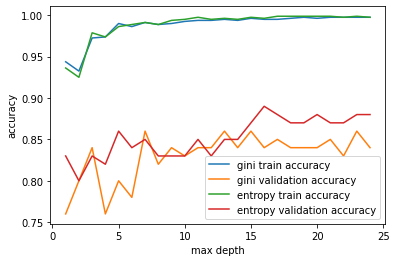

In [10]:
### 문제 2 ###
### 코드 작성 ###

gini_train_acc = []
gini_val_acc = []

entropy_train_acc = []
entropy_val_acc = []

D = range(1, 25)

for i in D:
  RFclassifier_gini = RandomForestClassifier(n_estimators = i, criterion = "gini", random_state = 0)
  RFclassifier_entropy = RandomForestClassifier(n_estimators = i, criterion = "entropy", random_state = 0)

  RFclassifier_gini.fit(X_train, y_train)
  RFclassifier_entropy.fit(X_train, y_train)

  gini_train_acc.append(RFclassifier_gini.score(X_train, y_train))
  entropy_train_acc.append(RFclassifier_entropy.score(X_train, y_train))

  gini_score = RFclassifier_gini.score(X_val, y_val)
  entropy_score = RFclassifier_entropy.score(X_val, y_val)

  gini_val_acc.append(gini_score)
  entropy_val_acc.append(entropy_score)

  if gini_score >= max(gini_val_acc):
    gini_max = i
    
  if entropy_score >= max(entropy_val_acc):
    entropy_max = i

plt.figure()
plt.plot(D, gini_train_acc, label='gini train accuracy')
plt.plot(D, gini_val_acc, label='gini validation accuracy')
plt.plot(D, entropy_train_acc, label='entropy train accuracy')
plt.plot(D, entropy_val_acc, label='entropy validation accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

if gini_max > entropy_max:
  max_depth = gini_max
  max_criterion = "gini"
  print('Max Depth > Gini: {depth}'.format(depth=max_depth))
else:
  max_depth = entropy_max
  max_criterion = "entropy"
  print('Max Depth > Entropy: {depth}'.format(depth=max_depth))

X_train_new = pd.concat([X_train, X_val])
y_train_new = pd.concat([y_train, y_val])

RFclassifier_name = RandomForestClassifier(n_estimators = max_depth, criterion = max_criterion, random_state = 0)
RFclassifier_name.fit(X_train_new, y_train_new)
RFclassifier_name.predict(X_test)
print('Test accuracy: {score:0.5f}'.format(score=RFclassifier_name.score(X_test, y_test)))


**설명 작성**  
- 최적의 파라미터: Gini를 사용했을 때 max depth = 23
- 설명: Gini과 Entropy criterion을 사용한다. 두 criterion의 정확도 최댓값을 비교해 최적의 파라미터를 찾은 결과, Gini를 사용하고 max depth 값이 23인 경우임을 알 수 있었다. (max depth 값은 테스트를 위해 1에서 25까지의 값으로 한정하였음) 최적의 파라미터와 Test set를 이용하여 계산한 Test accuarcy는 0.88이다.

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

Best parameter > 5
Test accuracy: 0.64000


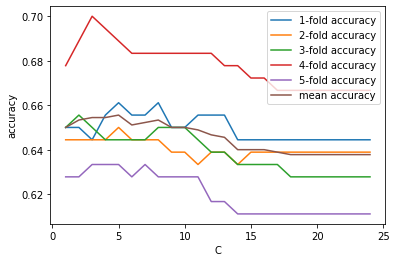

In [11]:
### 문제 3-1 ###
### 코드 작성 ###
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 19)

cv_scores = []
mean_scores = []

C = range(1, 25)
max_parameter = 0

for i in C:
  svm_name = SVC(C = i)
  cv_score = cross_val_score(svm_name, X_train, y_train, cv = 5, scoring = 'accuracy')
  cv_scores.append(cv_score)
  
  mean_score = np.mean(cv_score)
  mean_scores.append(mean_score)

  if mean_score >= max(mean_scores):
    max_parameter = i

a = np.array(cv_scores)

plt.figure()
plt.plot(C, a[:, 0], label='1-fold accuracy')
plt.plot(C, a[:, 1], label='2-fold accuracy')
plt.plot(C, a[:, 2], label='3-fold accuracy')
plt.plot(C, a[:, 3], label='4-fold accuracy')
plt.plot(C, a[:, 4], label='5-fold accuracy')
plt.plot(C, mean_scores, label='mean accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()

print('Best parameter > {parameter}'.format(parameter=max_parameter))

X_train_new = pd.concat([X_train, X_val])
y_train_new = pd.concat([y_train, y_val])

svm_max = SVC(C = max_parameter)
svm_max.fit(X_train_new, y_train_new)
svm_max.predict(X_test)
print('Test accuracy: {score:0.5f}'.format(score=svm_max.score(X_test, y_test)))


**설명 작성**  
- 최적의 파라미터: C = 5
- 설명: Test data를 제외한 90% 데이터를 사용하여 5-fold CV를 수행한 결과, 평균 정확도 중 가장 높은 정확도를 산출하는 것은 최적의 파라미터가 C = 5일 때임을 알 수 있었다. (C 값은 테스트를 위해 1에서 25까지의 값으로 한정하였음) 최적의 파라미터와 Test set을 이용하여 계산한 Test accuracy는 0.64이다.

Best parameter > 3
Test accuracy: 0.64000


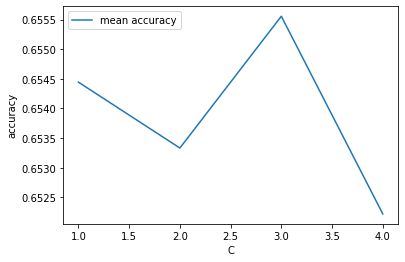

In [ ]:
### 문제 3-2 ###
### 코드 작성 ###
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 19)

mean_scores = []

C = range(1, 5)
max_parameter = 0

loo = LeaveOneOut()

for i in C:
  svm_name = SVC(C = i)
  cv_score = cross_val_score(svm_name, X_train, y_train, cv = loo, scoring = 'accuracy')

  mean_score = np.mean(cv_score)
  mean_scores.append(mean_score)

  if mean_score >= max(mean_scores):
    max_parameter = i

a = np.array(cv_scores)

plt.figure()
plt.plot(C, mean_scores, label='mean accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()

print('Best parameter > {parameter}'.format(parameter=max_parameter))

X_train_new = pd.concat([X_train, X_val])
y_train_new = pd.concat([y_train, y_val])

svm_max = SVC(C = max_parameter)
svm_max.fit(X_train_new, y_train_new)
svm_max.predict(X_test)
print('Test accuracy: {score:0.5f}'.format(score=svm_max.score(X_test, y_test)))

**설명 작성**  
- 최적의 파라미터: C = 3
- 설명: Test data를 제외한 90% 데이터를 사용하여 Leave-One-Out CV를 수행한 결과, 평균 정확도 중 가장 높은 정확도를 산출하는 것은 최적의 파라미터가 C = 3일 때임을 알 수 있었다. (C 값은 테스트를 위해 1에서 5까지의 값으로 한정하였음) 최적의 파라미터와 Test set을 이용하여 계산한 Test accuracy는 0.64이다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [14]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [15]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [16]:
from sklearn.metrics import r2_score

In [17]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    return 1 - (1 - r2(actual, predicted)) * (rowcount - 1) / (rowcount - featurecount - 1)
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [19]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [23]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################

            model.fit(X[excluded], y)
            model_pred_value = model.predict(X[excluded])
            model_score = adjr2(y, model_pred_value, len(X[excluded]), len(excluded))
            
            new_scores[new_column] = model_score

        if not new_scores:
          break
        else:
          best_r2 = max(new_scores.values())
          if best_r2 > 0.05: # significance_level = 0.05
            included.append(max(new_scores,key = new_scores.get))
            best_r2 = 0
            changed = True
        
        if not changed:
          break

        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

selected_features: ['MedInc', 'Population', 'AveBedrms', 'Latitude']


### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [25]:
### 문제 4-3 ###
### 코드 작성 ###
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mticker

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.1, random_state = 19)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state = 19)

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

ridge_value = []
lasso_value = []

max_ridge = 0
max_lasso = 0

for i in alpha:
  ridge_name = Ridge(alpha = i)
  ridge_name.fit(X_train, y_train)
  ridge_pred_value = ridge_name.predict(X_val)
  ridge_score = r2_score(y_val, ridge_pred_value)
  ridge_value.append(ridge_score)

  lasso_name = Lasso(alpha = i)
  lasso_name.fit(X_train, y_train)
  lasso_pred_value = lasso_name.predict(X_val)
  lasso_score = r2_score(y_val, lasso_pred_value)
  lasso_value.append(lasso_score)

  if ridge_score >= max(ridge_value):
    max_ridge = i
  if lasso_score >= max(lasso_value):
    max_lasso = i

print('Ridge > {parameter}'.format(parameter=max_ridge))
print('Lasso > {parameter}'.format(parameter=max_lasso))

Ridge > 1000
Lasso > 0.01


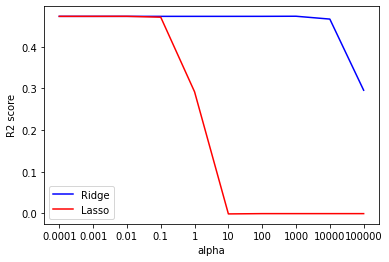

In [26]:
### 문제 4-3 ###
### 그래프 작성 ###
plt.figure()
plt.plot(range(len(alpha)), ridge_value, label='Ridge', color='blue')
plt.plot(range(len(alpha)), lasso_value, label='Lasso', color='red')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xticks(range(len(alpha)), alpha)
plt.legend()

- Rridge regression 모델 최적의 alpha 값: 1000
- Lasso regression 모델 최적의 alpha 값: 0.01

In [27]:
# 최종 결과 출력
X_train_new = pd.concat([X_train, X_val])
y_train_new = pd.concat([y_train, y_val])

ridge_max = Ridge(alpha = max_ridge)
ridge_max.fit(X_train_new, y_train_new)
ridge_pred_value = ridge_max.predict(X_test)

print("==== Ridge ====")
print('R2 score: {score:0.5f}'.format(score=r2_score(y_test, ridge_pred_value)))
print(pd.DataFrame(ridge_pred_value))

lasso_max = Lasso(alpha = max_lasso)
lasso_max.fit(X_train_new, y_train_new)
lasso_pred_value = lasso_max.predict(X_test)

print("==== Lasso ====")
print('R2 score: {score:0.5f}'.format(score=r2_score(y_test, lasso_pred_value)))
print(pd.DataFrame(lasso_pred_value))

==== Ridge ====
R2 score: 0.46242
             0
0     1.819357
1     0.341535
2     1.659977
3     1.599325
4     3.676878
...        ...
2059  1.466820
2060  1.770266
2061  1.805588
2062  0.716484
2063  2.030015

[2064 rows x 1 columns]
==== Lasso ====
R2 score: 0.46233
             0
0     1.826528
1     0.337369
2     1.657866
3     1.595512
4     3.692138
...        ...
2059  1.473154
2060  1.767269
2061  1.803611
2062  0.713205
2063  2.029723

[2064 rows x 1 columns]
